##Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [2]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoVWC_df')

## Set time slice to graph

In [3]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 10
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2015-11-02 18:45:00')

##Graph all sensors to check for anomolies

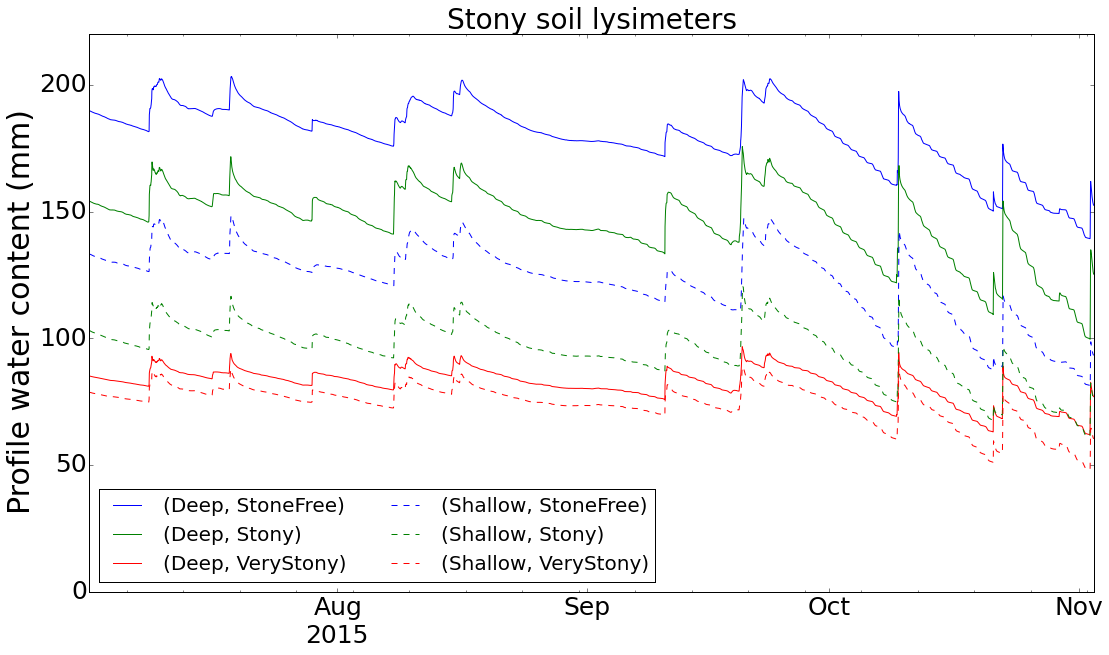

In [4]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
#DataMeans =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  Data.ix['2015-07-01 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function
DataMeans.where(DataMeans<0.7,np.nan,inplace=True)

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.ix[:,'D1'] * 150 + \
               DataMeans.ix[:,'D2'] * 150 + \
               DataMeans.ix[:,'D3'] * 150 + \
               DataMeans.ix[:,'D4'] * 150 
                
ProfileWater.plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,220))
plt.ylabel('Profile water content (mm)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=3, ncol=2)

In [5]:

##Graph treatment means by layer

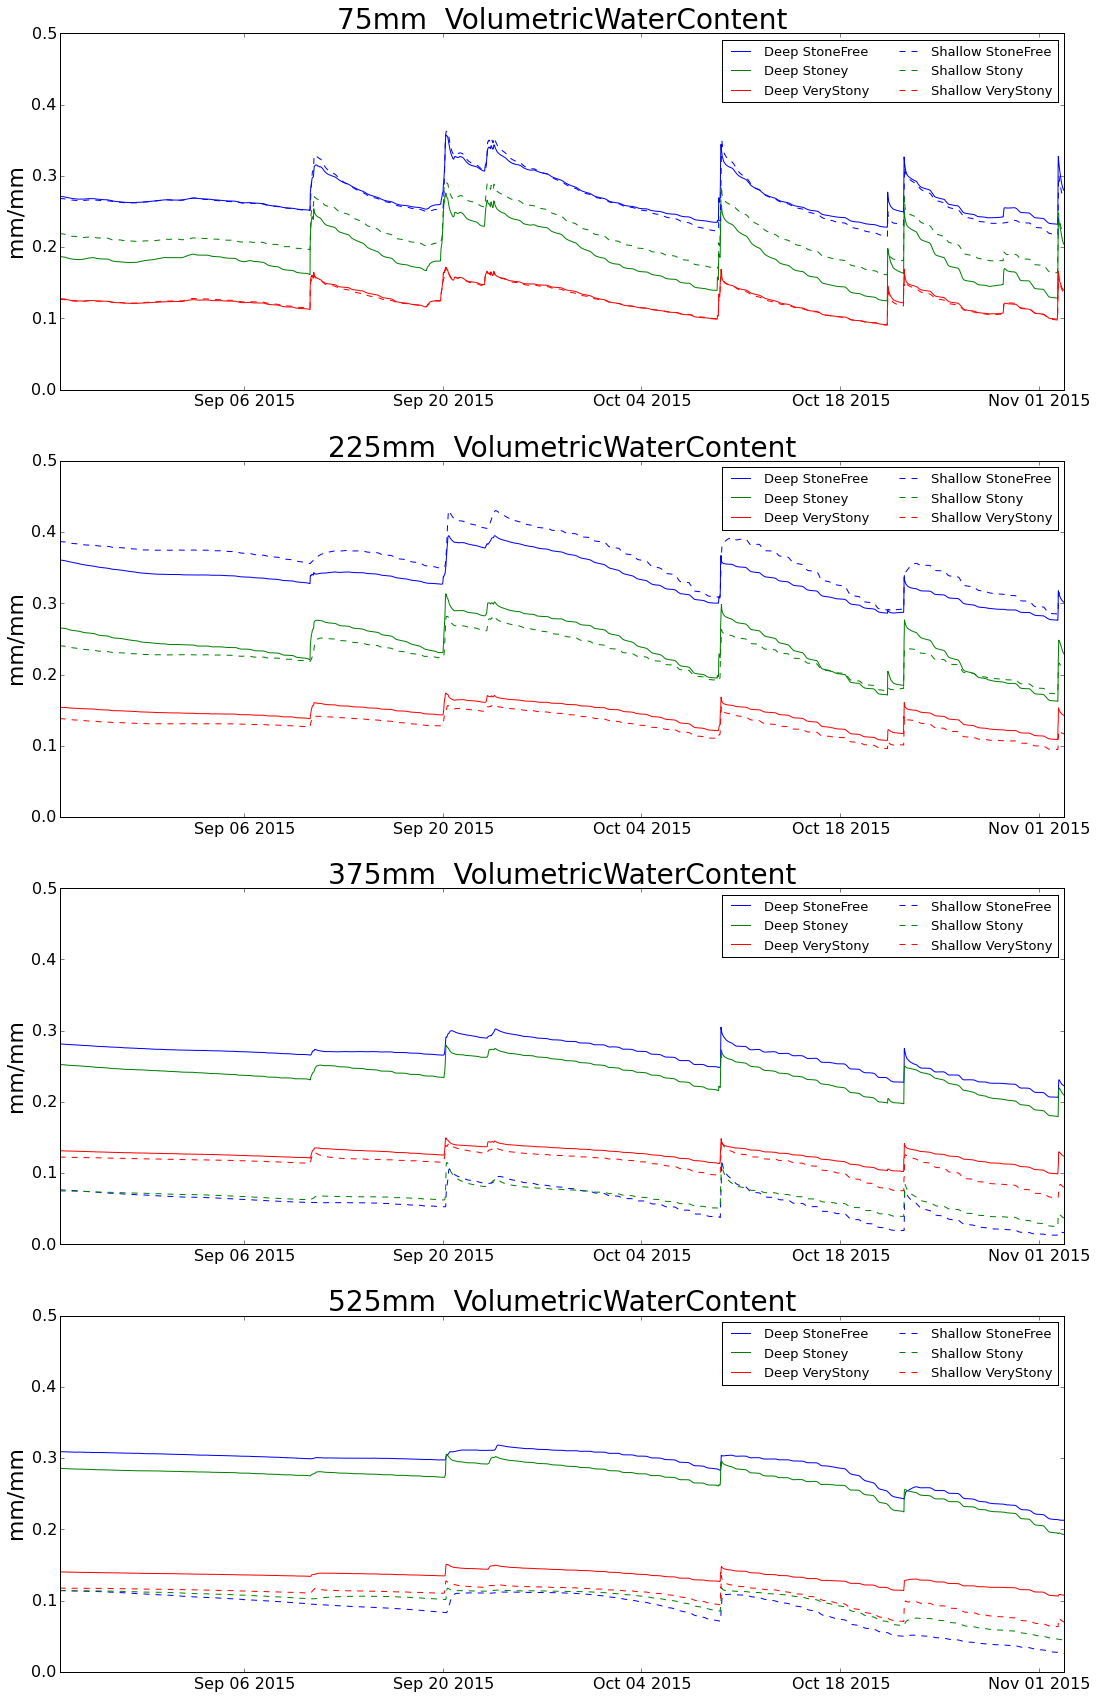

In [6]:
MeanLookSlice =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Gravels','Stones','Depth'],axis=1).mean()

MeanLookSlice = MeanLookSlice.ix[StartDateString:]
MeanLookSlice.where(MeanLookSlice<0.7,np.nan,inplace=True)


Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, LayerThickness, Ymax, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','g','r','b','g','r'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.Stony.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep Stoney');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.VeryStony.ix[StartDateString:,Depth]*LayerThickness,'-', label='Deep VeryStony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.Stony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow Stony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.VeryStony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow VeryStony');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,Ymax);
        plt.legend(loc=1, fontsize=13, ncol=2)
        return;

MakePlot(1,'D1',1,.5, '75mm')
MakePlot(2,'D2',1,.5, '225mm')
MakePlot(3,'D3',1,.5, '375mm')
MakePlot(4,'D4',1,.5, '525mm')

In [7]:
ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')]

2015-07-01 08:00:00    189.799277
2015-07-01 08:15:00    189.759589
2015-07-01 08:30:00    189.781215
2015-07-01 08:45:00    189.745576
2015-07-01 09:00:00    189.727837
2015-07-01 09:15:00    189.695196
2015-07-01 09:30:00    189.680698
2015-07-01 09:45:00    189.652187
2015-07-01 10:00:00    189.648704
2015-07-01 10:15:00    189.637770
2015-07-01 10:30:00    189.641576
2015-07-01 10:45:00    189.612822
2015-07-01 11:00:00    189.613065
2015-07-01 11:15:00    189.605856
2015-07-01 11:30:00    189.577264
2015-07-01 11:45:00    189.541382
2015-07-01 12:00:00    189.505258
2015-07-01 12:15:00    189.487439
2015-07-01 12:30:00    189.487439
2015-07-01 12:45:00    189.487439
2015-07-01 13:00:00    189.483955
2015-07-01 13:15:00    189.451557
2015-07-01 13:30:00    189.415756
2015-07-01 13:45:00    189.415918
2015-07-01 14:00:00    189.398341
2015-07-01 14:15:00    189.383843
2015-07-01 14:30:00    189.380198
2015-07-01 14:45:00    189.344074
2015-07-01 15:00:00    189.315724
2015-07-01 15:

In [8]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')

The draw time for this plot will be slow for all clients.


C:\Anaconda\lib\site-packages\plotly\plotly\plotly.py:1411: UserWarning:

Estimated Draw Time Too Long



In [9]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [10]:
#!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb

https://gist.github.com/604c4dfd746733297790
